In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

pd.set_option('display.max_columns', None)

data = pd.read_csv('../data/kc_house_data.csv')
df = data.copy()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:ylabel='Frequency'>

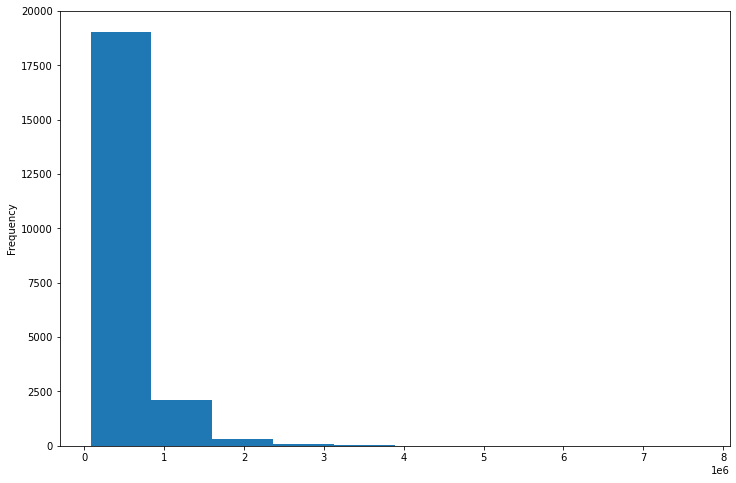

In [2]:
plt.subplots(figsize=(12,8))
df['price'].plot.hist()

In [3]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
data.corr().sort_values(by='price', ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_living15,-0.002701,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.731767,0.326377,-0.000247,-0.279299,0.048679,0.335626,1.000000,0.183515
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
lat,-0.001798,0.306692,-0.009951,0.024280,0.052155,-0.085514,0.049239,-0.001199,-0.148370,0.032145,0.266742,1.000000,-0.135371,0.048679,-0.086139
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204


<AxesSubplot:>

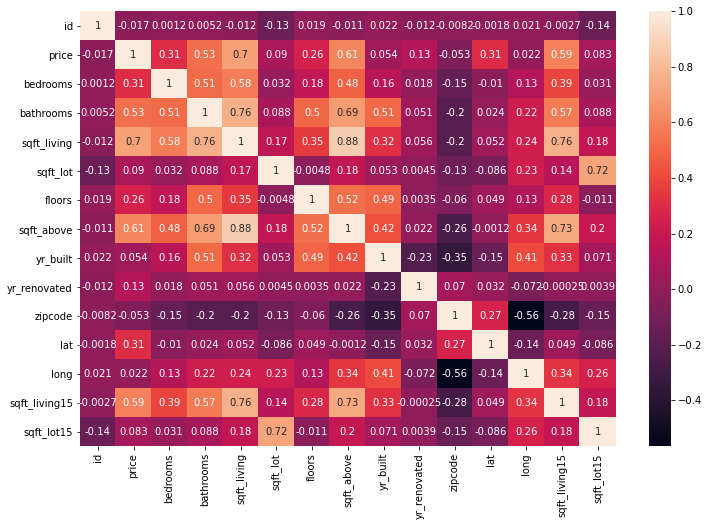

In [5]:
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

In [6]:
#0.7 corr, sqft_living to price

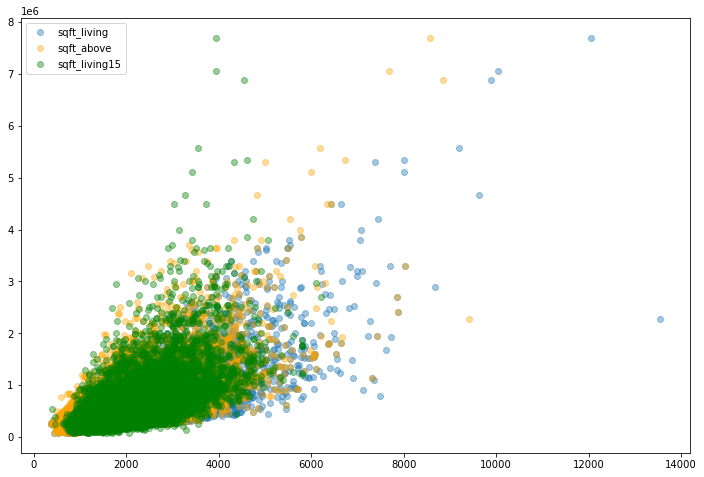

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df['sqft_living'], y=df['price'], alpha=0.4, label='sqft_living')
ax.scatter(x=df['sqft_above'], y=df['price'], alpha=0.4, label='sqft_above', color='orange')
ax.scatter(x=df['sqft_living15'], y=df['price'], alpha=0.4, label='sqft_living15', color='green')
#ax.scatter(x=df['bathrooms'], y=df['price'], alpha=0.4, label='bathrooms', color='cyan')
#ax.set_title('sqft_living vs price')
ax.legend()

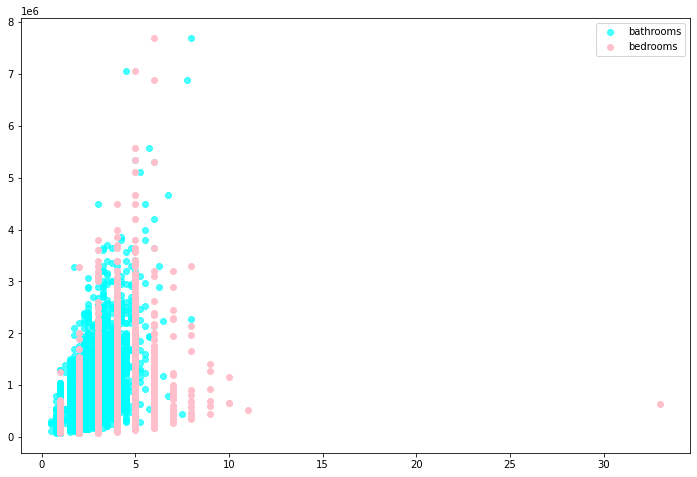

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df['bathrooms'], y=df['price'], alpha=0.7, label='bathrooms', color='cyan')
ax.scatter(x=df['bedrooms'], y=df['price'], alpha=1, label='bedrooms', color='pink')
#ax.set_title('bathrooms vs price')
ax.legend()

In [9]:
#???
df.sort_values(by='bedrooms', ascending=False).head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,NO,NONE,Average,7 Average,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,NO,AVERAGE,Average,9 Better,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400


In [10]:
#yr_renovated requires any preprocess?
#replace 0s with yr_built? new feature "years_since_renovated"?
#have to check corr either way, probably can only take one

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['sqft_living']], df[['price']])

In [12]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)
baseline.score(X_test, y_test)

0.4926861418930589

In [13]:
#cross_val_score(baseline, X_train, y_train, cv=10)
cross_val_score(baseline, X_test, y_test, cv=10)

array([0.45568475, 0.53241807, 0.47749094, 0.54719905, 0.52954137,
       0.42230622, 0.47568101, 0.46198485, 0.50733537, 0.47779838])

In [91]:
baseline = LinearRegression()
splitter = ShuffleSplit(n_splits=10, test_size=0.25)



baseline_scores = cross_validate(
    estimator=baseline,
    X=df[['sqft_living']],
    y=df[['price']],
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4929478748923536
Validation score: 0.4910966436763668


In [51]:

X_sm = sm.add_constant(df[['sqft_living']])
model = sm.OLS(df[['price']],X_sm)
results_baseline = model.fit()

results_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.080e+04
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        18:12:11   Log-Likelihood:            -2.9764e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.475e+04   4437.427    -10.084      0.000   -5.34e+04   -3.61e+04
sqft_living   281.0616      1.949    144.207      0.000     277.241     284.882
==============================================================================
Omnibus:                    14687.843   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           538458.356
Skew:                           2.822   Prob(JB):                         0.00
Kurtosis:                      26.905   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
data.loc[data.duplicated(['id'], keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,Average,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,Average,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,Average,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,Average,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,NONE,Average,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,Average,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,Average,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,Average,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,NONE,Average,9 Better,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [134]:
#looks like multiple entries on properties taken at different times.
to_drop = data.loc[data.duplicated(['id'])].index
df = data.drop(to_drop)
df.duplicated(['id']).sum()

0

In [135]:
#sqft_living15 and sqft_lot15 don't seem relevant
#sqft_above, bedroom, and bathroom highly correlated with sqft_living. drop?
#lat, long are no use
df = df.drop(['lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_above'], axis=1)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

# nonsense starts here

# nonsense end

In [138]:
#prep features
#x_cont = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20968 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20968 non-null  int64  
 1   date           20968 non-null  object 
 2   price          20968 non-null  float64
 3   bedrooms       20968 non-null  int64  
 4   bathrooms      20968 non-null  float64
 5   sqft_living    20968 non-null  int64  
 6   sqft_lot       20968 non-null  int64  
 7   floors         20968 non-null  float64
 8   waterfront     18652 non-null  object 
 9   view           20907 non-null  object 
 10  condition      20968 non-null  object 
 11  grade          20968 non-null  object 
 12  sqft_basement  20968 non-null  object 
 13  yr_built       20968 non-null  int64  
 14  yr_renovated   17251 non-null  float64
 15  zipcode        20968 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 2.7+ MB


In [130]:
#sqft_basement is a string
df['sqft_basement'].astype('float64')

ValueError: could not convert string to float: '?'

In [131]:
df['sqft_basement'].value_counts()

0.0       12717
?           452
600.0       216
500.0       206
700.0       205
          ...  
266.0         1
2400.0        1
475.0         1
875.0         1
295.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [136]:
df.loc[df['sqft_basement'] == '?'].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,?,1995,0.0,98003
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,NO,NONE,Good,7 Average,?,1921,0.0,98002
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,NO,NONE,Average,9 Better,?,2014,0.0,98053
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,NO,NONE,Average,10 Very Good,?,2002,0.0,98010
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,NO,NONE,Good,7 Average,?,1980,0.0,98038


In [137]:
#seems like missing data. going to drop.
to_drop = df.loc[df['sqft_basement'] == '?'].index
df = df.drop(to_drop)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,0.0,1955,0.0,98178
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,400.0,1951,1991.0,98125
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,0.0,1933,NaN,98028
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,910.0,1965,0.0,98136
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,0.0,2009,0.0,98103
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,0.0,2014,0.0,98146
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,0.0,2009,0.0,98144
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,0.0,2004,0.0,98027


In [139]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20968 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20968 non-null  int64  
 1   date           20968 non-null  object 
 2   price          20968 non-null  float64
 3   bedrooms       20968 non-null  int64  
 4   bathrooms      20968 non-null  float64
 5   sqft_living    20968 non-null  int64  
 6   sqft_lot       20968 non-null  int64  
 7   floors         20968 non-null  float64
 8   waterfront     18652 non-null  object 
 9   view           20907 non-null  object 
 10  condition      20968 non-null  object 
 11  grade          20968 non-null  object 
 12  sqft_basement  20968 non-null  float64
 13  yr_built       20968 non-null  int64  
 14  yr_renovated   17251 non-null  float64
 15  zipcode        20968 non-null  int64  
dtypes: float64(5), int64(6), object(5)
memory usage: 2.7+ MB


In [142]:
df.loc[df['waterfront'].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,0.0,1955,0.0,98178
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,NONE,Average,8 Good,1700.0,1965,0.0,98007
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,NONE,Average,7 Average,0.0,1985,NaN,98030
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,NONE,Average,9 Better,0.0,2000,NaN,98074
55,9822700295,5/12/2014,885000.0,4,2.50,2830,5000,2.0,NaN,NONE,Average,9 Better,0.0,1995,0.0,98105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,Average,8 Good,0.0,2008,0.0,98042
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,AVERAGE,Average,9 Better,0.0,2014,0.0,98001
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,Average,6 Low Average,0.0,2014,0.0,98010
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,Average,8 Good,0.0,2003,0.0,98065


In [170]:
#seems unlikely to me that waterfront would be missing, assuming nans are false
df.loc[df['waterfront'].isna(), 'waterfront'] = 0
df.loc[df['waterfront'] == 'NO', 'waterfront'] = 0
df.loc[df['waterfront'] == 'YES', 'waterfront'] = 1
df['waterfront'] = df['waterfront'].astype('int64')
df['waterfront'].value_counts()

0    20766
1      141
Name: waterfront, dtype: int64

In [146]:
df['view'].value_counts()

NONE         18851
AVERAGE        929
GOOD           493
FAIR           326
EXCELLENT      308
Name: view, dtype: int64

In [168]:
#since view has already been turned into a tiered hierarchy, can convert to ints
df.loc[df['view'] == 'NONE', 'view'] = 0
df.loc[df['view'] == 'FAIR', 'view'] = 1
df.loc[df['view'] == 'AVERAGE', 'view'] = 2
df.loc[df['view'] == 'GOOD', 'view'] = 3
df.loc[df['view'] == 'EXCELLENT', 'view'] = 4

df['view'] = df['view'].astype('int64')
df['view'].value_counts()
df.drop(df.loc[df['view'].isna()].index, inplace=True)

In [169]:
#can probably do something similar for condition
df['condition'].value_counts()

2    13570
3     5504
4     1648
1      158
0       27
Name: condition, dtype: int64

In [166]:
df.loc[df['condition'] == 'Poor', 'condition'] = 0
df.loc[df['condition'] == 'Fair', 'condition'] = 1
df.loc[df['condition'] == 'Average', 'condition'] = 2
df.loc[df['condition'] == 'Good', 'condition'] = 3
df.loc[df['condition'] == 'Very Good', 'condition'] = 4
df['condition'] = df['condition'].astype('int64')
df['condition'].value_counts()

2    13570
3     5504
4     1648
1      158
0       27
Name: condition, dtype: int64

In [154]:
df['grade'].value_counts()

7 Average        8679
8 Good           5898
9 Better         2537
6 Low Average    1948
10 Very Good     1104
11 Excellent      386
5 Fair            227
12 Luxury          87
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [160]:
teststr = '10 Very Good  '
def filterNumeric(string):
    output = ''
    for ch in string:
        if ch.isdigit():
            output = output + ch
    return output

filterNumeric(teststr)

'10'

In [163]:
df['grade'] = df['grade'].map(filterNumeric)
df['grade'] = df['grade'].astype('int64')
df['grade'].value_counts()

7     8679
8     5898
9     2537
6     1948
10    1104
11     386
5      227
12      87
4       27
13      13
3        1
Name: grade, dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20907 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20907 non-null  int64  
 1   date           20907 non-null  object 
 2   price          20907 non-null  float64
 3   bedrooms       20907 non-null  int64  
 4   bathrooms      20907 non-null  float64
 5   sqft_living    20907 non-null  int64  
 6   sqft_lot       20907 non-null  int64  
 7   floors         20907 non-null  float64
 8   waterfront     20907 non-null  int64  
 9   view           20907 non-null  int64  
 10  condition      20907 non-null  int64  
 11  grade          20907 non-null  int64  
 12  sqft_basement  20907 non-null  float64
 13  yr_built       20907 non-null  int64  
 14  yr_renovated   17202 non-null  float64
 15  zipcode        20907 non-null  int64  
dtypes: float64(5), int64(10), object(1)
memory usage: 3.3+ MB


In [174]:
#yr_renovated has lower correlation and lots of missing values, dropping
#zipcode seems like a hassle
df = df.drop(['yr_renovated', 'id', 'date', 'zipcode'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20907 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20907 non-null  float64
 1   bedrooms       20907 non-null  int64  
 2   bathrooms      20907 non-null  float64
 3   sqft_living    20907 non-null  int64  
 4   sqft_lot       20907 non-null  int64  
 5   floors         20907 non-null  float64
 6   waterfront     20907 non-null  int64  
 7   view           20907 non-null  int64  
 8   condition      20907 non-null  int64  
 9   grade          20907 non-null  int64  
 10  sqft_basement  20907 non-null  float64
 11  yr_built       20907 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 2.7 MB


In [175]:
x_processed = df.drop(['price'], axis=1)
y_processed = df['price']

In [176]:
X_sm = sm.add_constant(x_processed)
model = sm.OLS(y_processed,X_sm)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3573.
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        19:02:42   Log-Likelihood:            -2.8651e+05
No. Observations:               20907   AIC:                         5.730e+05
Df Residuals:                   20895   BIC:                         5.731e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.31e+06   1.32e+05     47.630      0.000    6.05e+06    6.57e+06
bedrooms      -3.961e+04   2074.599    -19.093      0.000   -4.37e+04   -3.55e+04
bathrooms      4.726e+04   3537.460     13.359      0.000    4.03e+04    5.42e+04
sqft_living     169.4729      3.553     47.697      0.000     162.508     176.437
sqft_lot         -0.2709      0.037     -7.253      0.000      -0.344      -0.198
floors         2.495e+04   3800.402      6.564      0.000    1.75e+04    3.24e+04
waterfront     5.947e+05   1.98e+04     30.009      0.000    5.56e+05    6.34e+05
view           4.771e+04   2272.254     20.996      0.000    4.33e+04    5.22e+04
condition      1.903e+04   2513.201      7.572      0.000    1.41e+04     2.4e+04
grade          1.254e+05   2206.910     56.800      0.000    1.21e+05     1.3e+05
sqft_basement     1.5094      4.526      0.334      0.739      -7.361      10.380
yr_built      -3624.2909     68.487    -52.919      0.000   -3758.531   -3490.051
==============================================================================
Omnibus:                    15433.399   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1049271.427
Skew:                           2.941   Prob(JB):                         0.00
Kurtosis:                      37.204   Cond. No.                     3.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
#multicollinearity might be an issue, sqft basement is the only nonsignificant feature
x_processed.drop(['sqft_basement'], axis=1)

#try with cross validation
model = LinearRegression()
splitter = ShuffleSplit(n_splits=10, test_size=0.25)



model_scores = cross_validate(
    estimator=model,
    X=x_processed,
    y=y_processed,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", model_scores["train_score"].mean())
print("Validation score:", model_scores["test_score"].mean())


Train score:      0.6539109117643068
Validation score: 0.6490147927149266


<AxesSubplot:>

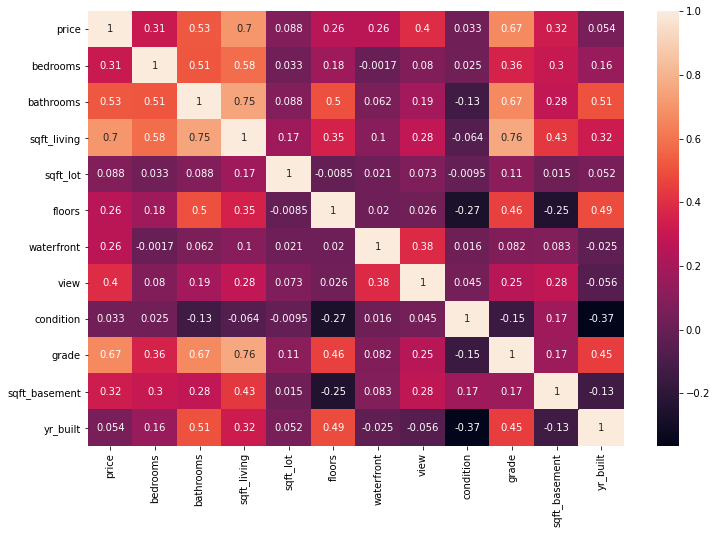

In [183]:
#better score, but still not great.
#check for multicollinearity
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

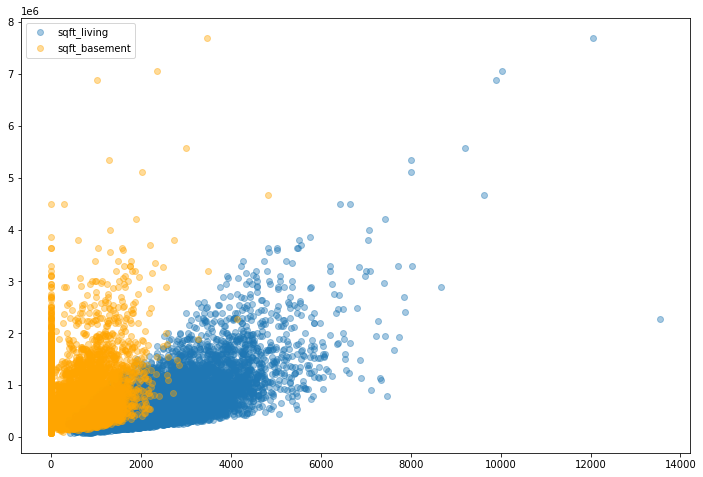

In [185]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df['sqft_living'], y=df['price'], alpha=0.4, label='sqft_living')
ax.scatter(x=df['sqft_basement'], y=df['price'], alpha=0.4, label='sqft_basement', color='orange')
#ax.scatter(x=df['sqft_living15'], y=df['price'], alpha=0.4, label='sqft_living15', color='green')
#ax.scatter(x=df['bathrooms'], y=df['price'], alpha=0.4, label='bathrooms', color='cyan')
#ax.set_title('sqft_living vs price')
ax.legend()

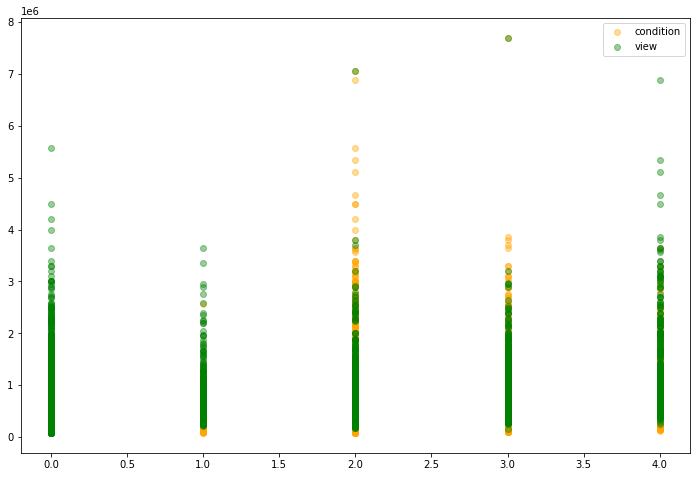

In [188]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.scatter(x=df['grade'], y=df['price'], alpha=0.4, label='grade')
ax.scatter(x=df['condition'], y=df['price'], alpha=0.4, label='condition', color='orange')
ax.scatter(x=df['view'], y=df['price'], alpha=0.4, label='view', color='green')
#ax.set_title('sqft_living vs price')
ax.legend()

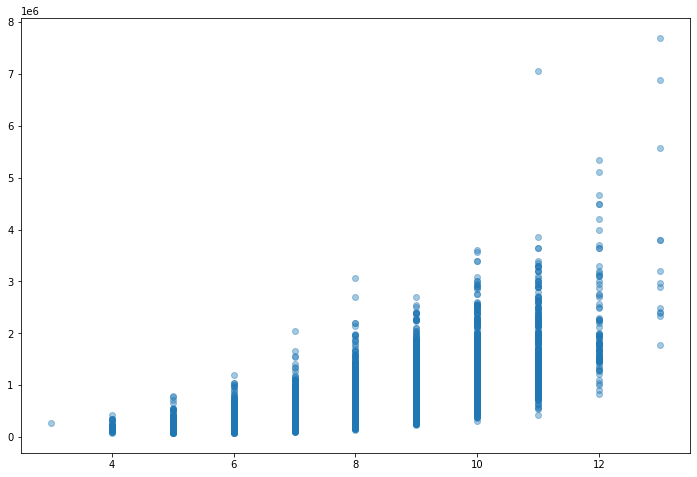

In [190]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df['grade'], y=df['price'], alpha=0.4, label='grade')

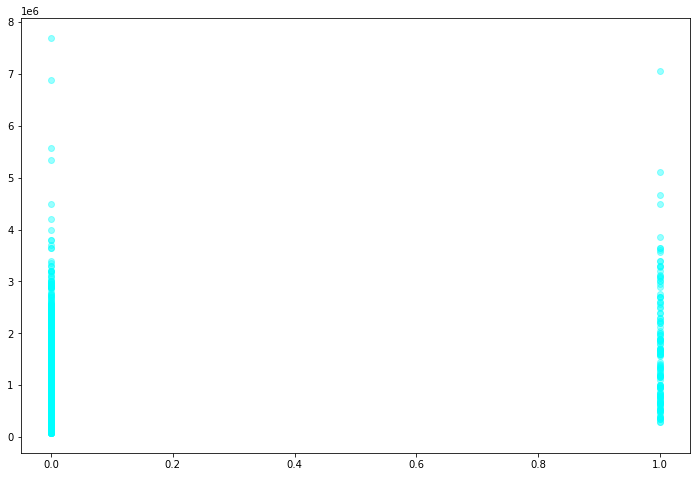

In [191]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df['waterfront'], y=df['price'], alpha=0.4, label='waterfront', color='cyan')


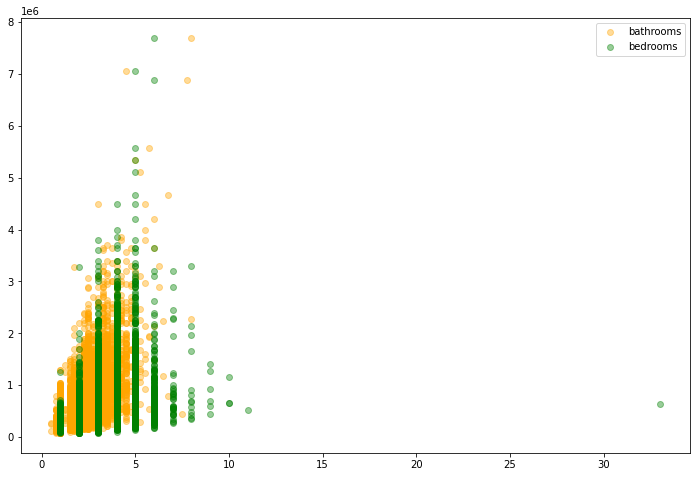

In [192]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.scatter(x=df['grade'], y=df['price'], alpha=0.4, label='grade')
ax.scatter(x=df['bathrooms'], y=df['price'], alpha=0.4, label='bathrooms', color='orange')
ax.scatter(x=df['bedrooms'], y=df['price'], alpha=0.4, label='bedrooms', color='green')
#ax.set_title('sqft_living vs price')
ax.legend()

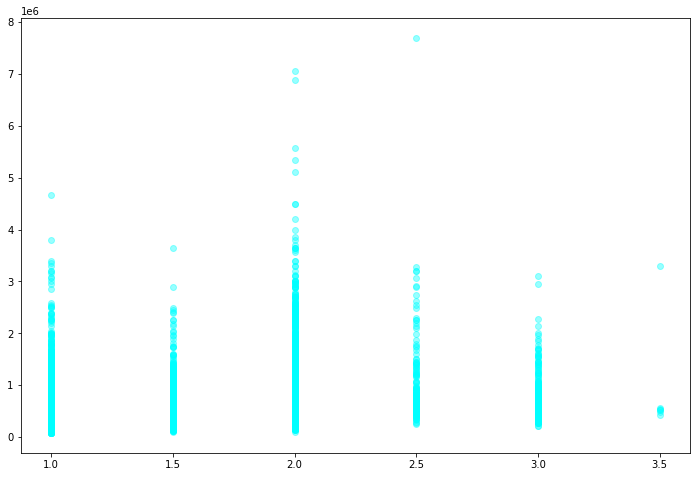

In [194]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df['floors'], y=df['price'], alpha=0.4, label='floors', color='cyan')


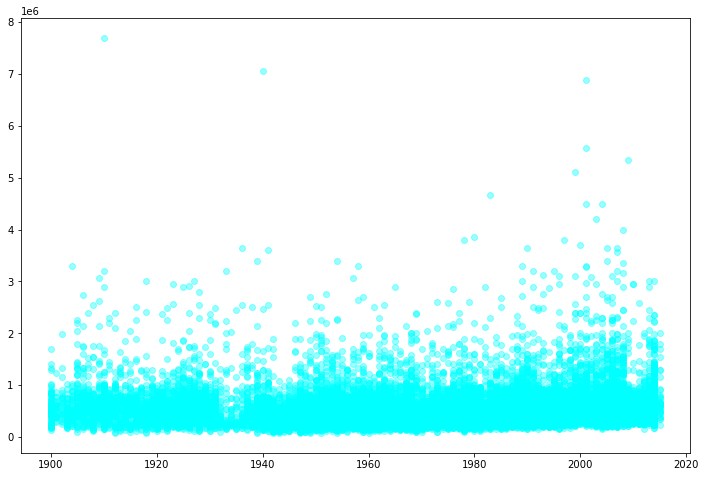

In [195]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df['yr_built'], y=df['price'], alpha=0.4, label='yr_built', color='cyan')
